In [1]:
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt
# importamos deepcopy para copiar objetos
from copy import deepcopy

In [2]:
def detectar_circulos(images):
    # Convertir la imagen a escala de grises
    images_circulos = []
    for img in images:
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        # Detectar círculos utilizando la transformada de Hough para círculos
        circles = cv2.HoughCircles(
            blurred,
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=50,
            param1=50,
            param2=30,
            minRadius=10,
            maxRadius=100
        )

        # Dibujar los círculos en la imagen original
        img_circulos = img.copy()
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                cv2.circle(img_circulos, (i[0], i[1]), i[2], (0, 255, 0), 2)

        images_circulos.append(img_circulos)

    return images_circulos

In [3]:
def load_images(filenames):
    return [imageio.imread(filename) for filename in filenames]

filenames = [f'calibracion/img{i}.jpg' for i in range(1,24)]
images = load_images(filenames)

/var/folders/11/8n3x035j1rngnz1l98ysm7vm0000gn/T/ipykernel_57748/807623881.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


In [14]:
def show_circles(images):
    fig, ax = plt.subplots(4, 6, figsize=(15, 10))
    for i, img in enumerate(images):
        ax[i//6, i%6].imshow(img)
        ax[i//6, i%6].axis('off')
    plt.show()

def show_image(img):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

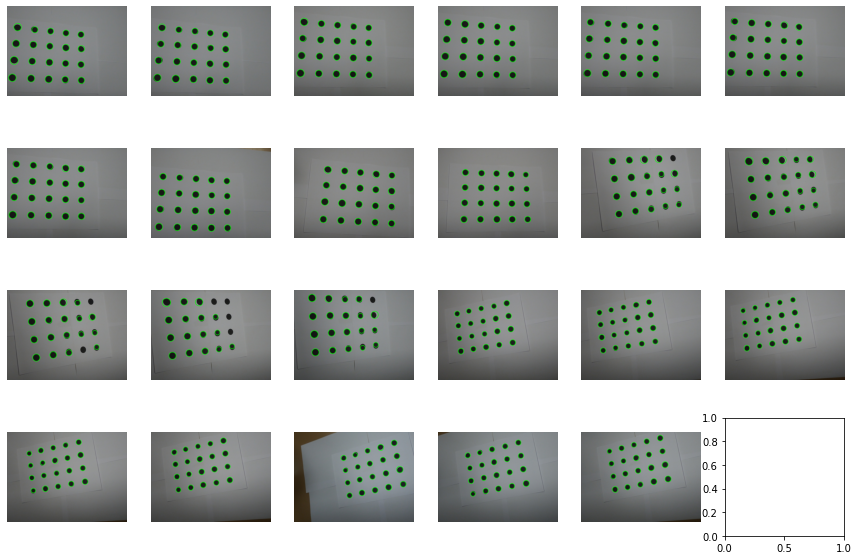

In [15]:
images_circulos = detectar_circulos(images)
show_circles(images_circulos)


In [6]:
def detectar_rectangulos(images):
    # Convertir la imagen a escala de grises
    images_rectangulos = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        # Detectar bordes con Canny
        canny = cv2.Canny(blurred, 30, 150)
        # Encontrar contornos
        contours, _ = cv2.findContours(
            canny.copy(),
            cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE
        )
        # Dibujar los contornos en la imagen original
        img_rectangulos = img.copy()
        cv2.drawContours(img_rectangulos, contours, -1, (0, 255, 0), 2)
 
        images_rectangulos.append(img_rectangulos)
 
    return images_rectangulos

In [12]:
# ahora hacemos una funcion que una vez detecta un patron circulo/trianuglo/rectangulo
# detecta el color del circulo/triangulo/rectangulo

def detectar_colores(images):
    # Convertir la imagen a escala de grises
    images_colores = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        # Detectar bordes con Canny
        canny = cv2.Canny(blurred, 30, 150)
        # Encontrar contornos
        contours, _ = cv2.findContours(
            canny.copy(),
            cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE
        )
        # Dibujar los contornos en la imagen original
        img_colores = img.copy()
        cv2.drawContours(img_colores, contours, -1, (0, 255, 0), 2)

        # Ahora detectamos el color dentro del contorno
        for c in contours:
            # Calculamos el centroide
            M = cv2.moments(c)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
            else:
                cX, cY = 0, 0

            # Detectamos el color en el centroide
            color = img_colores[cY, cX]
            # Dibujamos el texto con el color
            cv2.putText(img_colores, str(color), (cX - 20, cY - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
            
 
        images_colores.append(img_colores)
 
    return images_colores



/var/folders/11/8n3x035j1rngnz1l98ysm7vm0000gn/T/ipykernel_57748/807623881.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


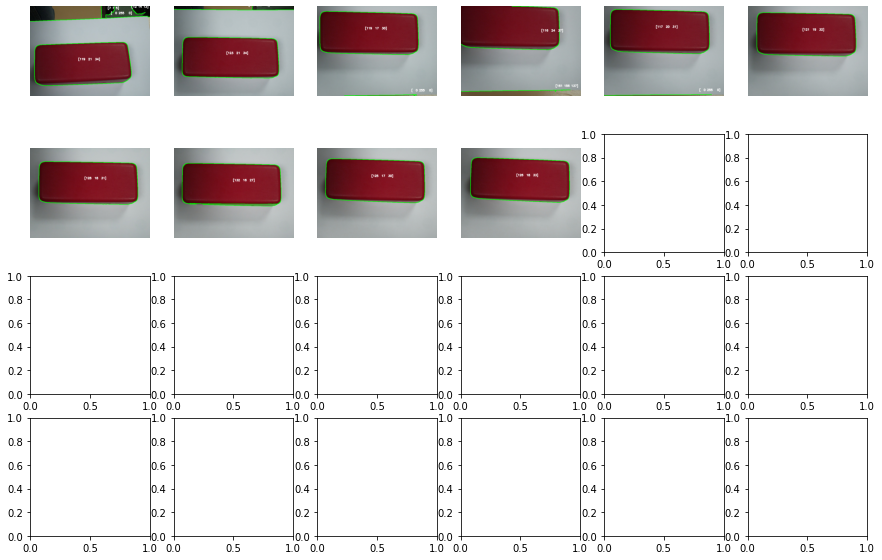

In [19]:
file_rectangulo = [f'rectangulos/imagen_{i}.jpg' for i in range(1,11)]
images_rectangulos = load_images(file_rectangulo)

# images_rectangulos = detectar_rectangulos(images_rectangulos)
images_rectangulos = detectar_colores(images_rectangulos)
show_circles(images_rectangulos)